In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
data= pd.read_excel('cs_bar.xlsx')
data

,Algorithm,Category,Metric,Score
0,SVM,Standard,G-mean,48.46
1,SVM,Cost-Sensitive,G-mean,81.18
2,LR,Standard,G-mean,24.79
3,LR,Cost-Sensitive,G-mean,80.41
4,DT,Standard,G-mean,65.34
5,DT,Cost-Sensitive,G-mean,65.14
6,RF,Standard,G-mean,63.56
7,RF,Cost-Sensitive,G-mean,61.63
8,SVM,Standard,ROC-AUC,70.80
9,SVM,Cost-Sensitive,ROC-AUC,83.75


In [4]:
df= data.iloc[:8,:]
df

,Algorithm,Category,Metric,Score
0,SVM,Standard,G-mean,48.46
1,SVM,Cost-Sensitive,G-mean,81.18
2,LR,Standard,G-mean,24.79
3,LR,Cost-Sensitive,G-mean,80.41
4,DT,Standard,G-mean,65.34
5,DT,Cost-Sensitive,G-mean,65.14
6,RF,Standard,G-mean,63.56
7,RF,Cost-Sensitive,G-mean,61.63


<IPython.core.display.Javascript object>


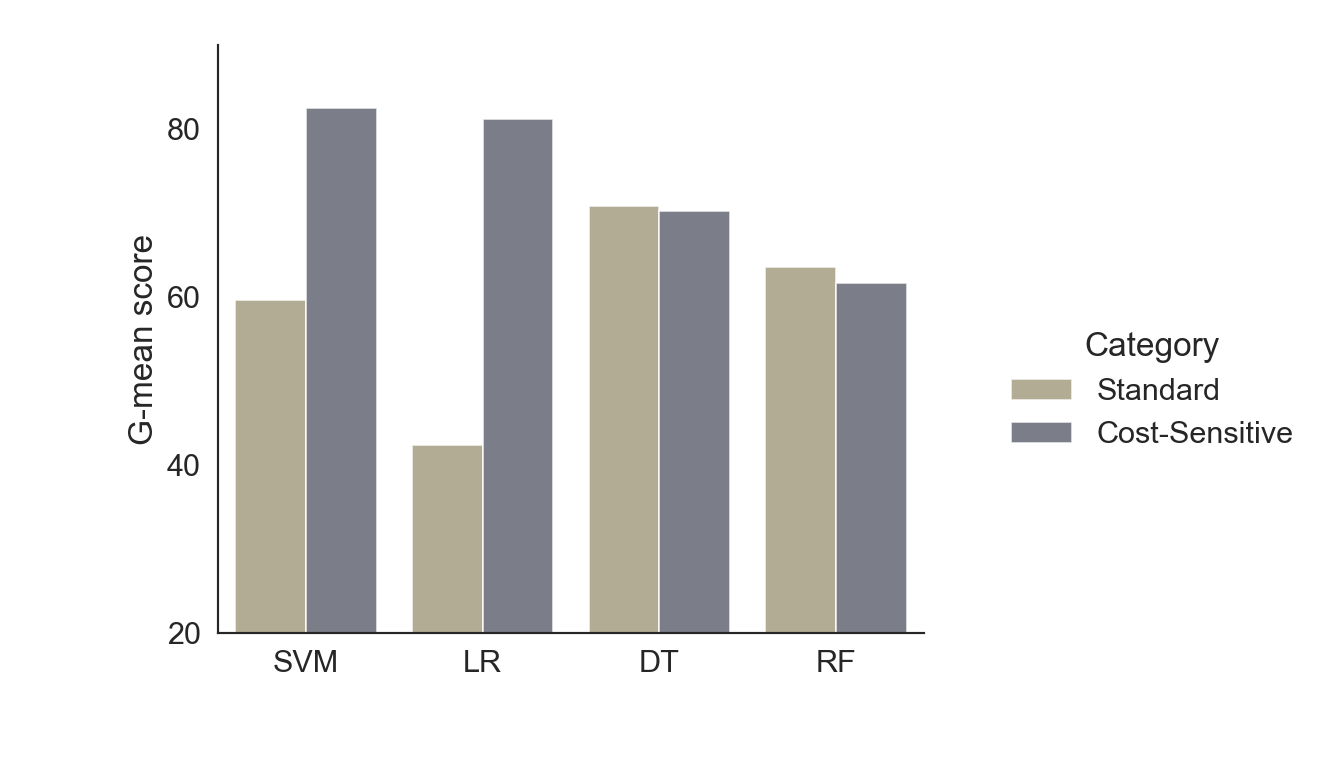

([<matplotlib.axis.YTick at 0x220d0571190>,
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60')])

In [5]:
sns.set(font_scale=1.6,style='white')
#plt.figure(figsize=(16,8))

g= sns.catplot(x="Algorithm", y="Score", hue="Category", kind="bar", data=data, palette= "cividis_r", alpha=.8, aspect=1.2, ci=None)
#plt.xticks(rotation=70)
g.set(ylim=(20,90))
g.set_axis_labels(" ", "G-mean score")
plt.yticks([20,40,60,80])
#plt.gcf().subplots_adjust(bottom=0.27)

In [6]:
plt.savefig('icost_bar.pdf', dpi=600)
plt.savefig('icsot_bar.png', dpi=600)

<IPython.core.display.Javascript object>


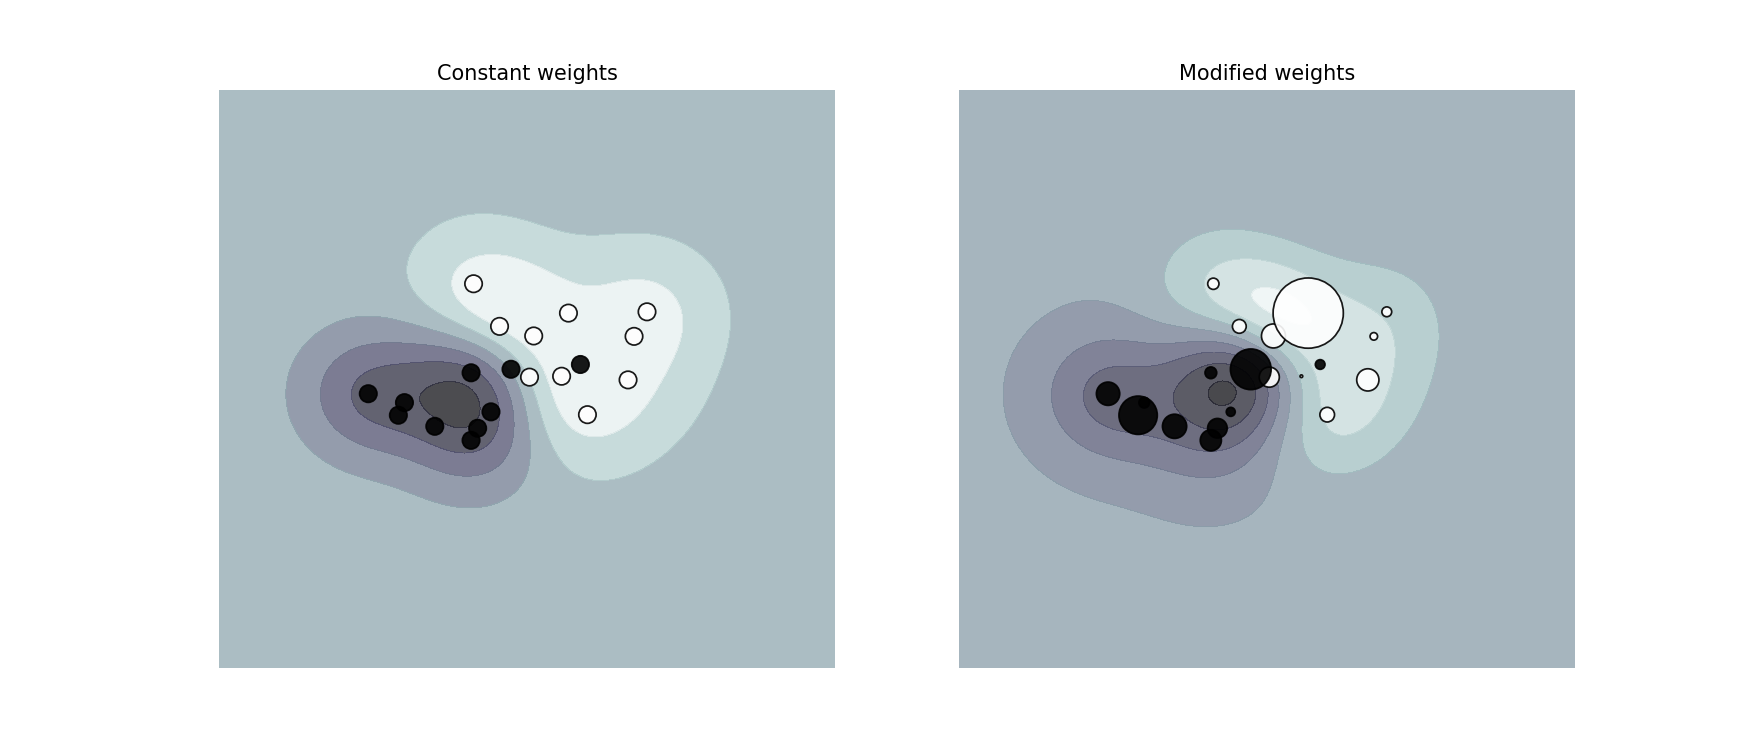

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm


def plot_decision_function(classifier, sample_weight, axis, title):
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        s=100 * sample_weight,
        alpha=0.9,
        cmap=plt.cm.bone,
        edgecolors="black",
    )

    axis.axis("off")
    axis.set_title(title)


# we create 20 points
np.random.seed(20500)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10
sample_weight_last_ten = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))
# and bigger weights to some outliers
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] *= 15

# Fit the models.

# This model does not take into account sample weights.
clf_no_weights = svm.SVC(gamma=1)
clf_no_weights.fit(X, y)

# This other model takes into account some dedicated sample weights.
clf_weights = svm.SVC(gamma=1)
clf_weights.fit(X, y, sample_weight=sample_weight_last_ten)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_function(
    clf_no_weights, sample_weight_constant, axes[0], "Constant weights"
)
plot_decision_function(clf_weights, sample_weight_last_ten, axes[1], "Modified weights")

plt.show()

In [9]:
plt.savefig('icost_weight.svg', dpi=600)
plt.savefig('icsot_weight.png', dpi=600)

# improvement figure

In [31]:
data= pd.read_excel('icost_lr_v2.xlsx', sheet_name=1)
data

,Unnamed: 0,dataset,Imbalance Ratio,LR,CS-LR,iCost
0,37.0,glass1,1.800000,1.535611,23.034222,24.149333
1,0.0,wisconsin,1.860000,92.669401,93.742615,93.745330
2,40.0,pima,1.870000,47.047618,47.667417,48.129272
3,36.0,glass0,2.090000,27.374937,46.210205,50.662285
4,41.0,yeast1,2.460000,27.348709,39.563762,40.019390
...,...,...,...,...,...,...
62,26.0,poker-8-9_vs_5,81.960000,0.000000,2.380052,3.262156
63,15.0,poker_86,85.880000,0.000000,-2.386886,-1.534785
64,38.0,kddr_rookkit,100.140000,94.495471,100.000000,100.000000
65,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df= data.iloc[:65,1:]
df

,dataset,Imbalance Ratio,LR,CS-LR,iCost
0,glass1,1.80,1.535611,23.034222,24.149333
1,wisconsin,1.86,92.669401,93.742615,93.745330
2,pima,1.87,47.047618,47.667417,48.129272
3,glass0,2.09,27.374937,46.210205,50.662285
4,yeast1,2.46,27.348709,39.563762,40.019390
...,...,...,...,...,...
60,abalone_20,72.69,0.000000,31.960442,36.688248
61,kddcup-land_vs_satan,79.45,97.293313,100.000000,100.000000
62,poker-8-9_vs_5,81.96,0.000000,2.380052,3.262156
63,poker_86,85.88,0.000000,-2.386886,-1.534785


In [33]:
df['diff']= df.iCost-df['CS-LR']

In [34]:
df

,dataset,Imbalance Ratio,LR,CS-LR,iCost,diff
0,glass1,1.80,1.535611,23.034222,24.149333,1.115111
1,wisconsin,1.86,92.669401,93.742615,93.745330,0.002716
2,pima,1.87,47.047618,47.667417,48.129272,0.461855
3,glass0,2.09,27.374937,46.210205,50.662285,4.452080
4,yeast1,2.46,27.348709,39.563762,40.019390,0.455628
...,...,...,...,...,...,...
60,abalone_20,72.69,0.000000,31.960442,36.688248,4.727806
61,kddcup-land_vs_satan,79.45,97.293313,100.000000,100.000000,0.000000
62,poker-8-9_vs_5,81.96,0.000000,2.380052,3.262156,0.882105
63,poker_86,85.88,0.000000,-2.386886,-1.534785,0.852101


In [35]:
df['diff'].mean()

3.3509129614778077

<IPython.core.display.Javascript object>


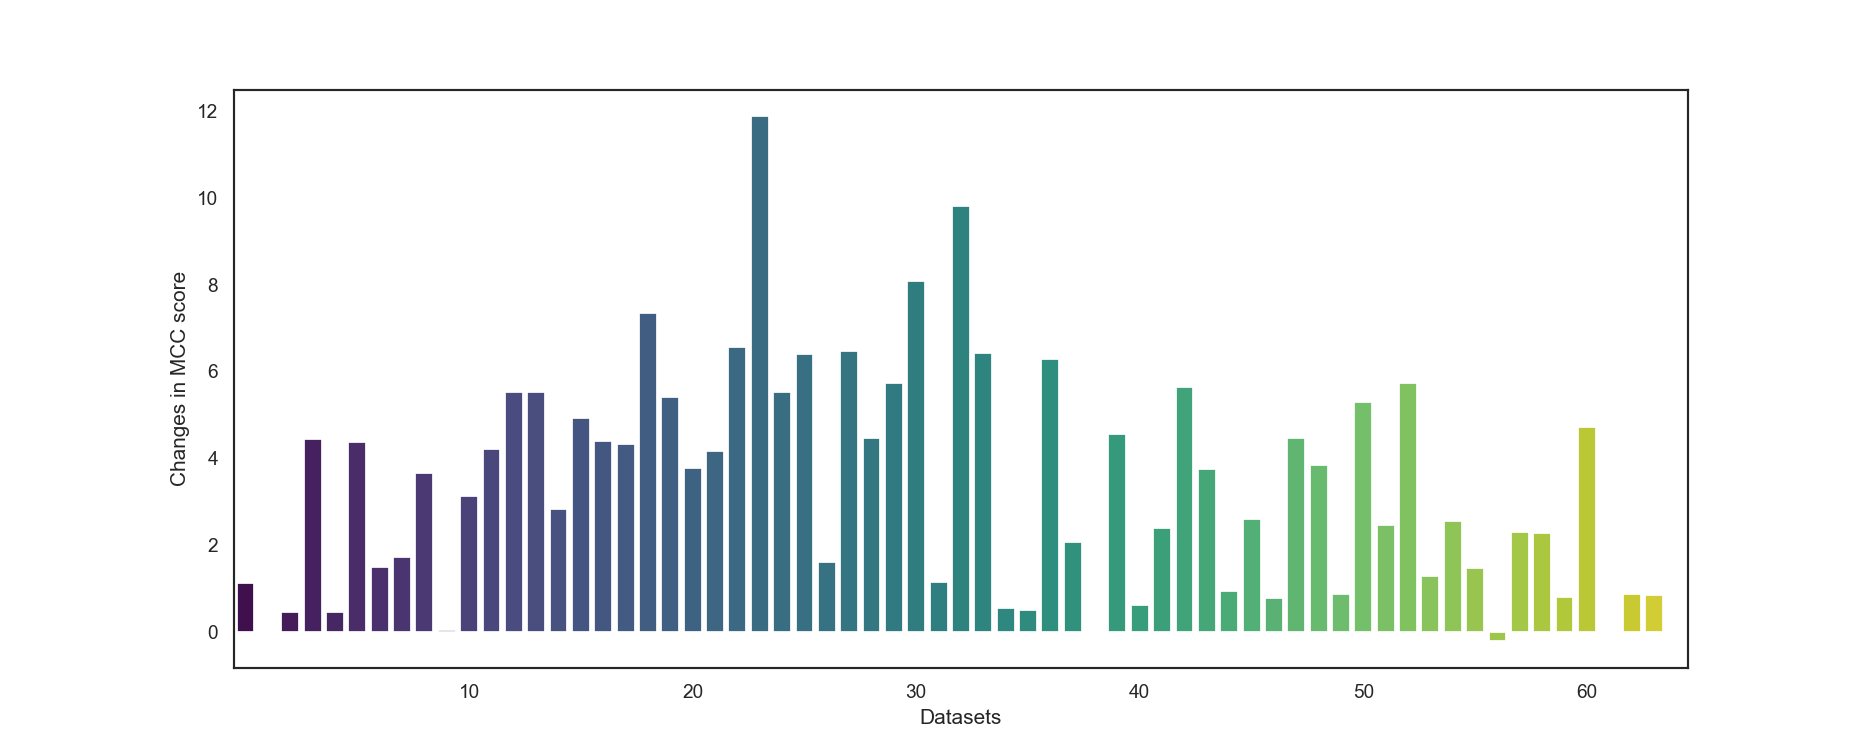

In [19]:
sns.set(style="white")
plt.figure(figsize=(15, 6))
ax=sns.barplot(x=df.index, y='diff', data=df, palette='viridis')
#plt.title('Bar Plot Example')
plt.xlabel('Datasets')
plt.ylabel('Changes in MCC score')
ax.set_xticks([10, 20, 30, 40, 50, 60])
#plt.show()
#ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

In [20]:
plt.savefig('icost_lr.svg', dpi=600)
plt.savefig('icsot_lr.png', dpi=600)

In [36]:
data= pd.read_excel('icost_svm_v2.xlsx', sheet_name=1)
data

,Unnamed: 0,dataset,Imbalance Ratio,SVM,CS-SVM,iCost
0,37.0,glass1,1.800000,26.145505,38.610268,44.648982
1,0.0,wisconsin,1.860000,93.377552,93.590863,93.768347
2,40.0,pima,1.870000,46.552460,46.713345,48.223907
3,36.0,glass0,2.090000,25.972842,49.227150,55.630924
4,41.0,yeast1,2.460000,32.103158,39.295167,42.833893
...,...,...,...,...,...,...
62,26.0,poker-8-9_vs_5,81.960000,0.000000,13.300786,13.553357
63,15.0,poker_86,85.880000,20.090337,78.057027,78.057027
64,38.0,kddr_rookkit,100.140000,97.414373,97.414373,97.414373
65,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df= data.iloc[:65,1:]
df

,dataset,Imbalance Ratio,SVM,CS-SVM,iCost
0,glass1,1.80,26.145505,38.610268,44.648982
1,wisconsin,1.86,93.377552,93.590863,93.768347
2,pima,1.87,46.552460,46.713345,48.223907
3,glass0,2.09,25.972842,49.227150,55.630924
4,yeast1,2.46,32.103158,39.295167,42.833893
...,...,...,...,...,...
60,abalone_20,72.69,0.000000,32.518567,35.631043
61,kddcup-land_vs_satan,79.45,99.458668,100.000000,100.000000
62,poker-8-9_vs_5,81.96,0.000000,13.300786,13.553357
63,poker_86,85.88,20.090337,78.057027,78.057027


In [38]:
df['diff']= df.iCost-df['CS-SVM']

In [39]:
df['diff'].mean()

2.024051986190046

<IPython.core.display.Javascript object>


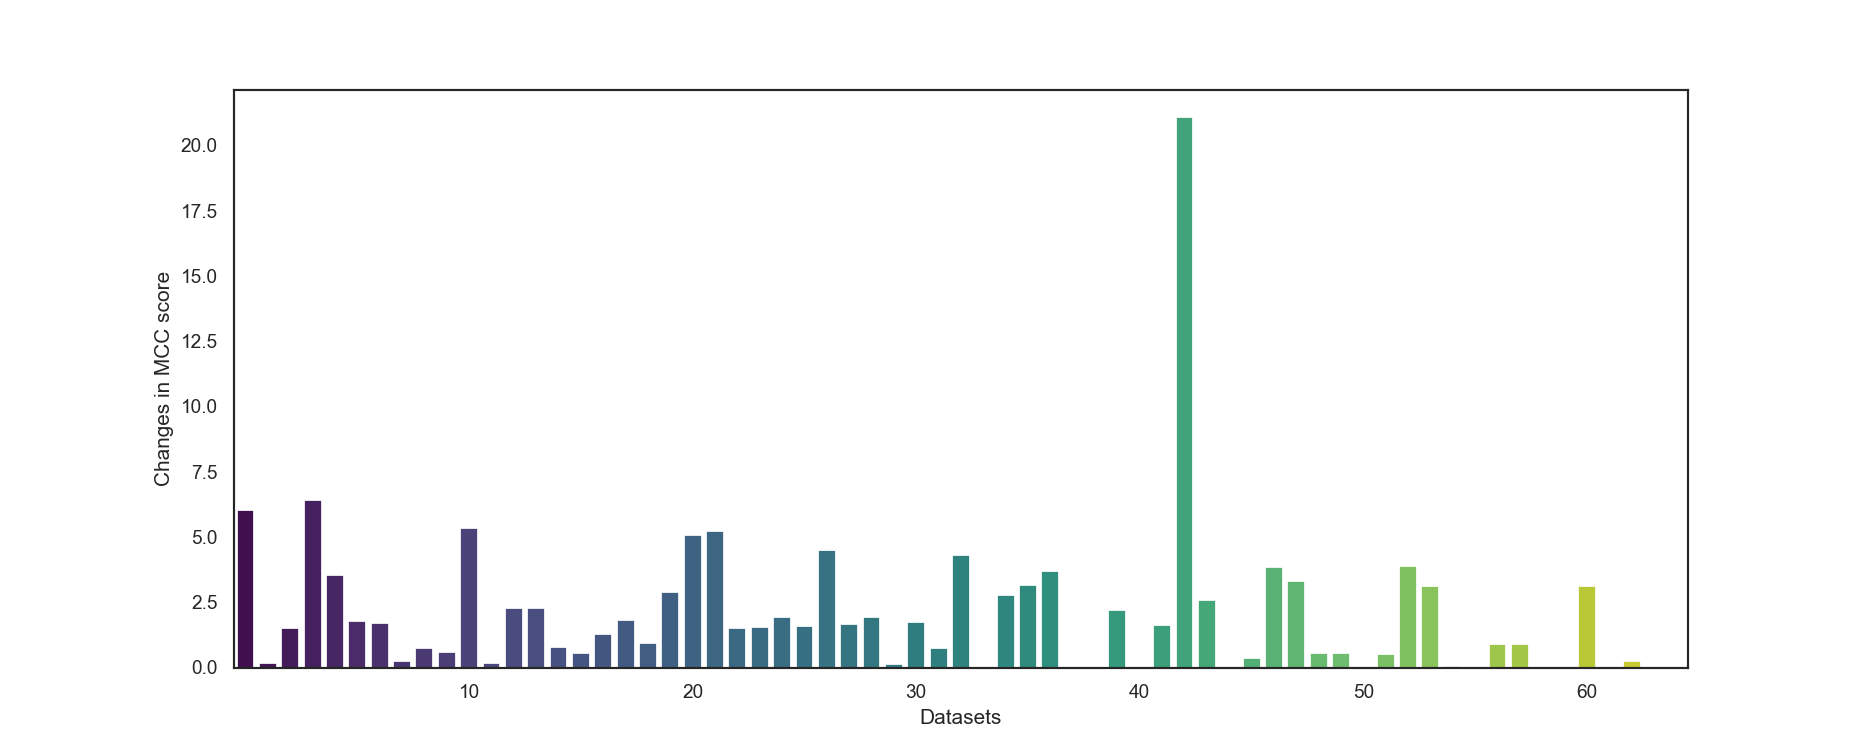

In [24]:
sns.set(style="white")
plt.figure(figsize=(15, 6))
ax=sns.barplot(x=df.index, y='diff', data=df, palette='viridis')
#plt.title('Bar Plot Example')
plt.xlabel('Datasets')
plt.ylabel('Changes in MCC score')
ax.set_xticks([10, 20, 30, 40, 50, 60])
#plt.show()
#ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

In [25]:
plt.savefig('icost_svm.svg', dpi=600)
plt.savefig('icsot_svm.png', dpi=600)

In [40]:
data= pd.read_excel('icost_dt_v2.xlsx', sheet_name=1)
data

,Unnamed: 0,dataset,Imbalance Ratio,DT,CS-DT,iCost
0,37.0,glass1,1.800000,46.093903,47.953581,54.091959
1,0.0,wisconsin,1.860000,88.376212,87.400200,88.699404
2,40.0,pima,1.870000,35.172840,34.264068,36.124577
3,36.0,glass0,2.090000,55.867557,57.955394,58.692809
4,41.0,yeast1,2.460000,27.742741,30.475674,31.470640
...,...,...,...,...,...,...
62,26.0,poker-8-9_vs_5,81.960000,13.257932,8.565018,9.648860
63,15.0,poker_86,85.880000,10.721518,4.134634,6.254400
64,38.0,kddr_rookkit,100.140000,99.545684,98.956702,100.000000
65,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df= data.iloc[:65,1:]
df

,dataset,Imbalance Ratio,DT,CS-DT,iCost
0,glass1,1.80,46.093903,47.953581,54.091959
1,wisconsin,1.86,88.376212,87.400200,88.699404
2,pima,1.87,35.172840,34.264068,36.124577
3,glass0,2.09,55.867557,57.955394,58.692809
4,yeast1,2.46,27.742741,30.475674,31.470640
...,...,...,...,...,...
60,abalone_20,72.69,18.824444,18.506300,18.545963
61,kddcup-land_vs_satan,79.45,97.466227,94.272702,97.990632
62,poker-8-9_vs_5,81.96,13.257932,8.565018,9.648860
63,poker_86,85.88,10.721518,4.134634,6.254400


In [42]:
df['diff']= df.iCost-df['CS-DT']

In [43]:
df['diff'].mean()

1.437312638558859

<IPython.core.display.Javascript object>


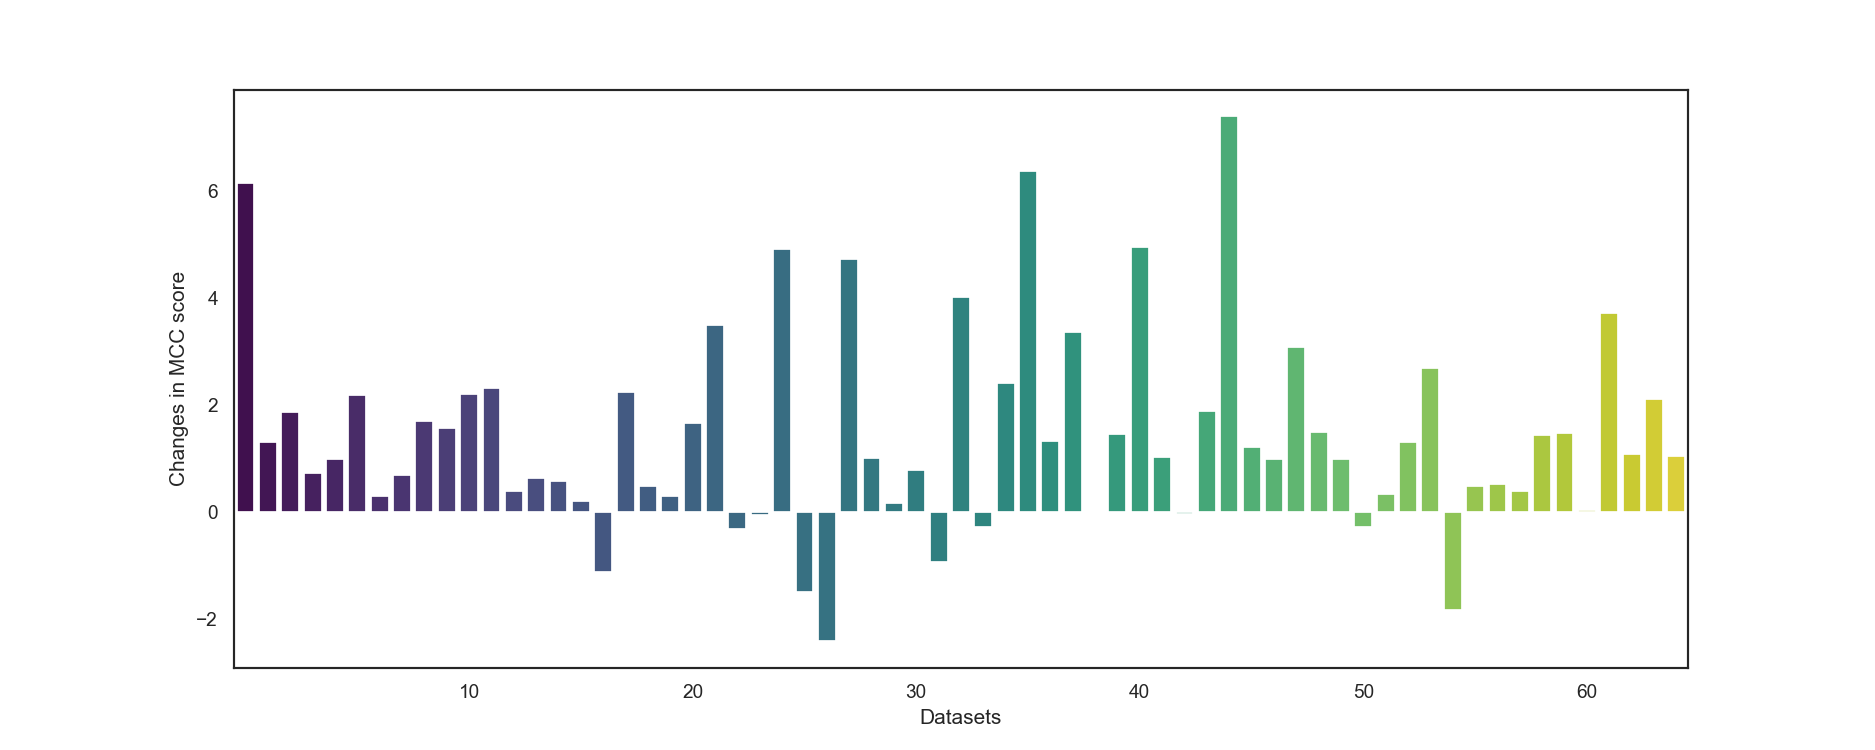

In [29]:
sns.set(style="white")
plt.figure(figsize=(15, 6))
ax=sns.barplot(x=df.index, y='diff', data=df, palette='viridis')
#plt.title('Bar Plot Example')
plt.xlabel('Datasets')
plt.ylabel('Changes in MCC score')
ax.set_xticks([10, 20, 30, 40, 50, 60])
#plt.show()
#ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

In [30]:
plt.savefig('icost_dt.svg', dpi=600)
plt.savefig('icsot_dt.png', dpi=600)

# Pair-wise - LR

In [49]:
data= pd.read_excel('icost_pair.xlsx')
data

,Metrics,Approach,Value
0,Sensitivity,CS (traditional),80.21
1,Sensitivity,Proposed,78.43
2,Specificity,CS (traditional),83.26
3,Specificity,Proposed,85.47
4,Precision,CS (traditional),41.87
5,Precision,Proposed,47.13
6,ROC-AUC,CS (traditional),81.73
7,ROC-AUC,Proposed,81.95
8,G-mean,CS (traditional),80.29
9,G-mean,Proposed,81.03


<IPython.core.display.Javascript object>


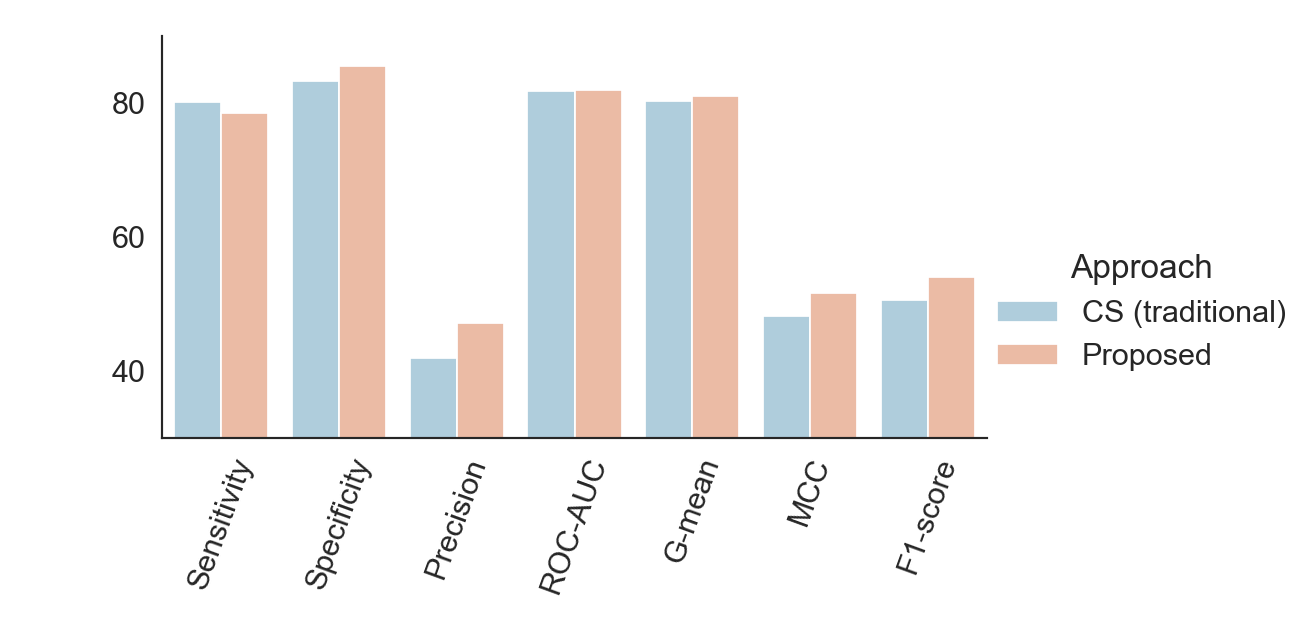

In [72]:
sns.set(font_scale=1.6,style='white')
#plt.figure(figsize=(16,8))

g= sns.catplot(x="Metrics", y="Value", hue='Approach', kind="bar", data=data, palette= "RdBu_r", alpha=1, aspect=1.6, ci=None)
plt.xticks(rotation=70)
g.set(ylim=(30,90))
g.set_axis_labels("", "")
plt.yticks([40,60,80])
plt.gcf().subplots_adjust(bottom=0.3)
#plt.legend( loc='upper right')

In [73]:
plt.savefig('icost_pair_lr.svg', dpi=600)
plt.savefig('icsot_pair_lr.png', dpi=600)

# Improvement - RF

In [3]:
data= pd.read_excel('icost_rf.xlsx', sheet_name=0)
data

,Unnamed: 0,dataset,Imbalance Ratio,RF,CS_RF,ic
0,0,wisconsin,1.86,93.822524,93.504663,94.112915
1,1,yeast,8.10,72.298686,73.233055,73.991027
2,2,vehicle1,2.90,39.296637,39.287906,40.818414
3,3,yeast3,8.10,72.298686,73.233055,73.991027
4,4,vowel,9.98,95.952453,95.510319,96.526728
...,...,...,...,...,...,...
60,60,ecoli-0-3-4-6_vs_5,9.25,82.321534,78.103165,82.977684
61,61,ecoli-0-3-4-7_vs_5-6,9.28,76.115203,76.225496,77.111338
62,62,ecoli-0-6-7_vs_5,10.00,78.795754,77.198578,79.473738
63,63,ecoli-0-2-3-4_vs_5,9.10,82.059749,79.853799,81.480731


In [4]:
df= data.iloc[:65,1:]
df

,dataset,Imbalance Ratio,RF,CS_RF,ic
0,wisconsin,1.86,93.822524,93.504663,94.112915
1,yeast,8.10,72.298686,73.233055,73.991027
2,vehicle1,2.90,39.296637,39.287906,40.818414
3,yeast3,8.10,72.298686,73.233055,73.991027
4,vowel,9.98,95.952453,95.510319,96.526728
...,...,...,...,...,...
60,ecoli-0-3-4-6_vs_5,9.25,82.321534,78.103165,82.977684
61,ecoli-0-3-4-7_vs_5-6,9.28,76.115203,76.225496,77.111338
62,ecoli-0-6-7_vs_5,10.00,78.795754,77.198578,79.473738
63,ecoli-0-2-3-4_vs_5,9.10,82.059749,79.853799,81.480731


In [5]:
df['diff']= df.ic-df['CS_RF']

In [6]:
df['diff'].mean()

1.159450824216137

In [8]:
df

,dataset,Imbalance Ratio,RF,CS_RF,ic,diff
0,wisconsin,1.86,93.822524,93.504663,94.112915,0.608253
1,yeast,8.10,72.298686,73.233055,73.991027,0.757972
2,vehicle1,2.90,39.296637,39.287906,40.818414,1.530509
3,yeast3,8.10,72.298686,73.233055,73.991027,0.757972
4,vowel,9.98,95.952453,95.510319,96.526728,1.016410
...,...,...,...,...,...,...
60,ecoli-0-3-4-6_vs_5,9.25,82.321534,78.103165,82.977684,4.874519
61,ecoli-0-3-4-7_vs_5-6,9.28,76.115203,76.225496,77.111338,0.885842
62,ecoli-0-6-7_vs_5,10.00,78.795754,77.198578,79.473738,2.275160
63,ecoli-0-2-3-4_vs_5,9.10,82.059749,79.853799,81.480731,1.626932


<IPython.core.display.Javascript object>


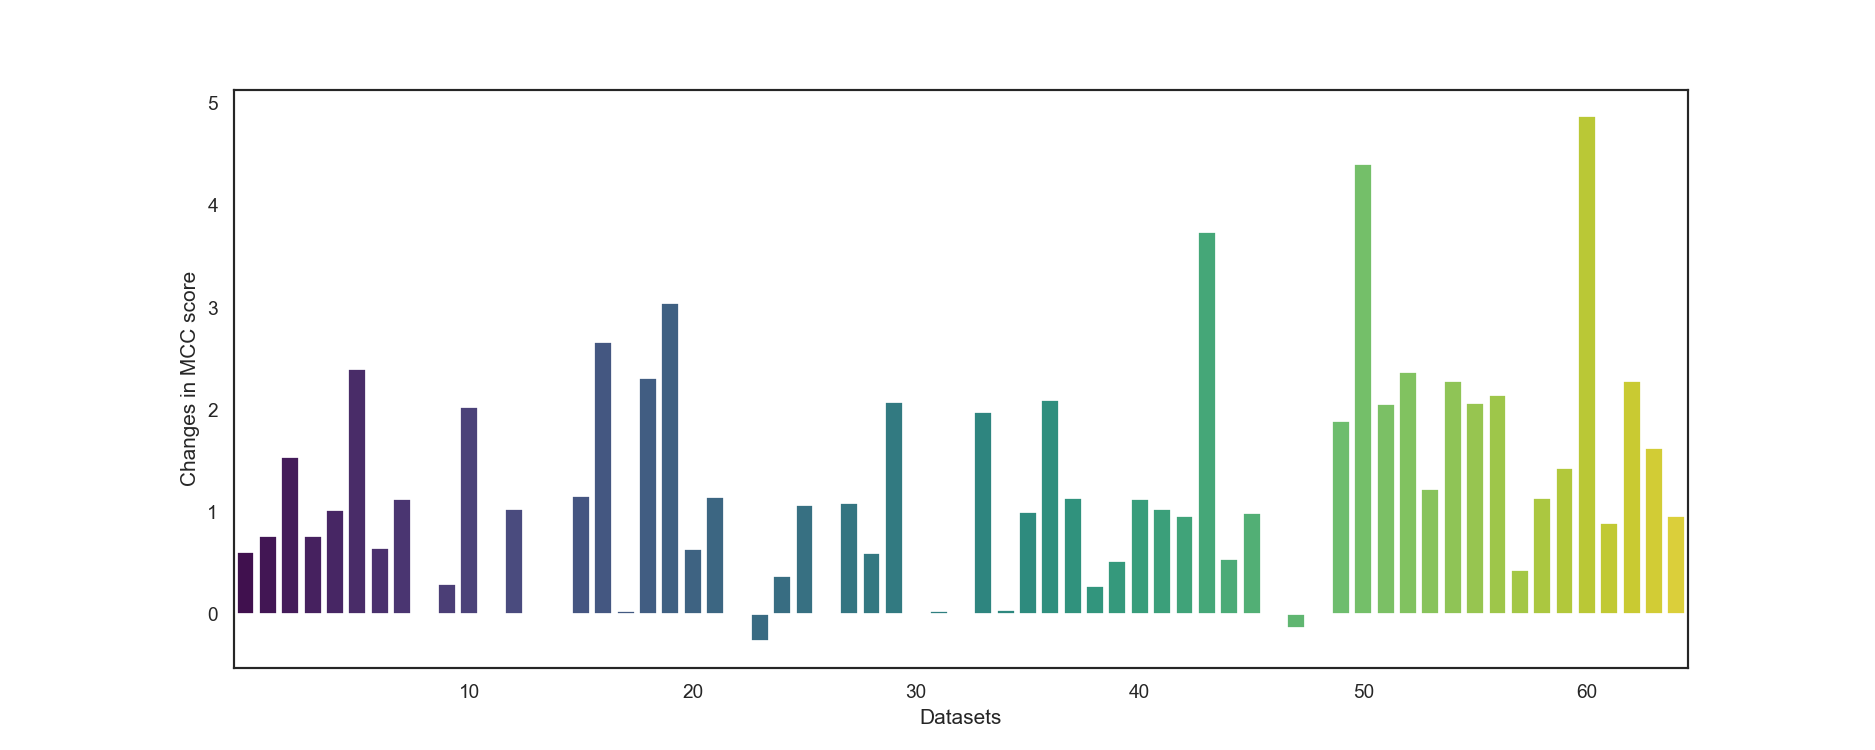

In [7]:
sns.set(style="white")
plt.figure(figsize=(15, 6))
ax=sns.barplot(x=df.index, y='diff', data=df, palette='viridis')
#plt.title('Bar Plot Example')
plt.xlabel('Datasets')
plt.ylabel('Changes in MCC score')
ax.set_xticks([10, 20, 30, 40, 50, 60])
#plt.show()
#ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

In [9]:
plt.savefig('icost_rf.pdf', dpi=600)
plt.savefig('icsot_rf.png', dpi=600)

# Multiclass - LR

In [10]:
data= pd.read_excel('icost_lr_multi.xlsx', sheet_name=1)
data

,Unnamed: 0,dataset,LR,CS-LR,icost
0,1,thyroid,32.587494,41.772678,42.672927
1,2,new-thyroid,54.563385,68.709808,80.717849
2,3,Contraceptive,22.350253,25.678386,26.041835
3,4,shuttle,60.606568,59.856628,63.192159
4,5,Dry_Bean,88.731615,89.224426,89.428324
5,6,balance,76.304306,82.271722,84.796032
6,7,pageblocks,51.144529,62.204421,64.193420
7,8,HCV,36.999179,52.179922,56.398371
8,9,Yeast,41.090845,41.245258,40.479994
9,10,wine,97.695873,96.341541,95.904304


In [16]:
data['diff']= data.icost-data['CS-LR']
data

,Unnamed: 0,dataset,LR,CS-LR,icost,diff
0,1,thyroid,32.587494,41.772678,42.672927,0.900249
1,2,new-thyroid,54.563385,68.709808,80.717849,12.008041
2,3,Contraceptive,22.350253,25.678386,26.041835,0.363449
3,4,shuttle,60.606568,59.856628,63.192159,3.335530
4,5,Dry_Bean,88.731615,89.224426,89.428324,0.203898
5,6,balance,76.304306,82.271722,84.796032,2.524310
6,7,pageblocks,51.144529,62.204421,64.193420,1.988999
7,8,HCV,36.999179,52.179922,56.398371,4.218449
8,9,Yeast,41.090845,41.245258,40.479994,-0.765264
9,10,wine,97.695873,96.341541,95.904304,-0.437237


<IPython.core.display.Javascript object>


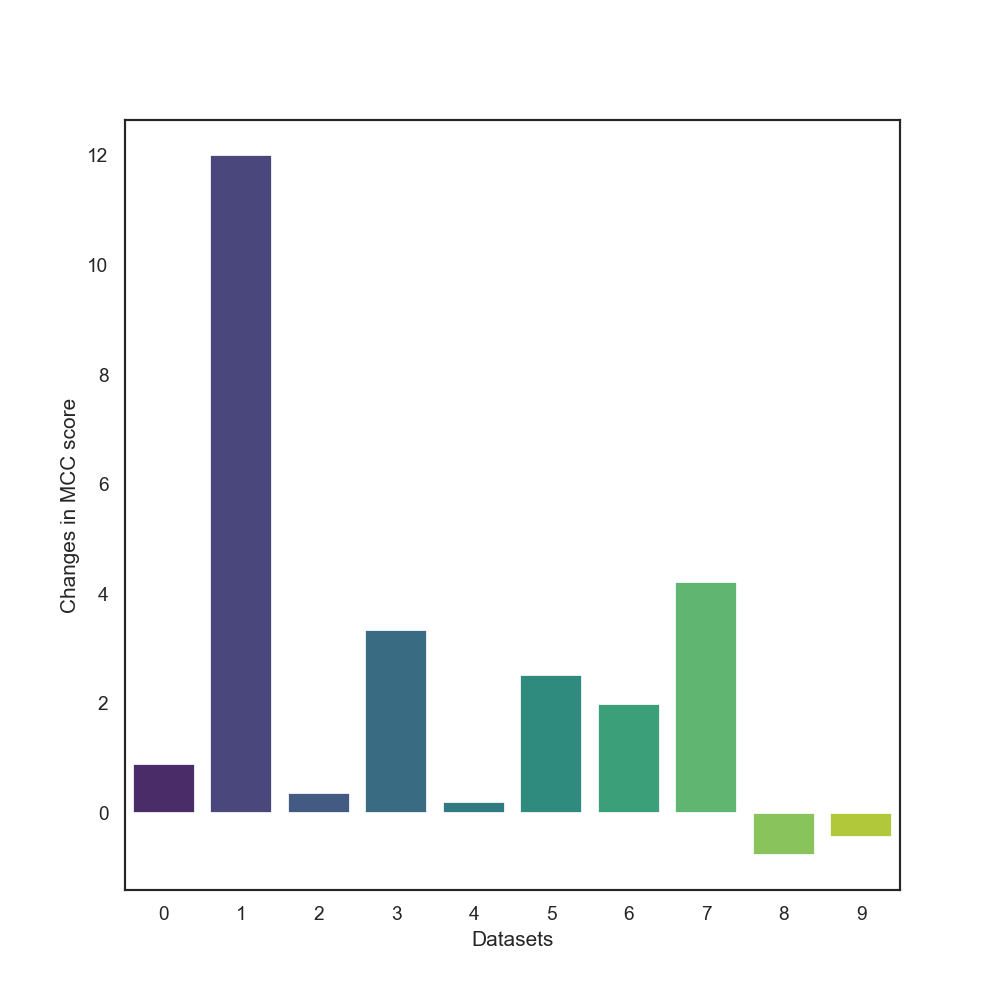

Text(0, 0.5, 'Changes in MCC score')

In [20]:
sns.set(style="white")
plt.figure(figsize=(8, 8))
ax=sns.barplot(x=data.index, y='diff', data=data, palette='viridis')
#plt.title('Bar Plot Example')
plt.xlabel('Datasets')
plt.ylabel('Changes in MCC score')
#ax.set_xticks([10, 20, 30, 40, 50, 60])
#plt.show()
#ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

In [21]:
plt.savefig('icost_lr_multi.pdf', dpi=600)
plt.savefig('icsot_lr_multi.png', dpi=600)

# DT-multi

In [22]:
data= pd.read_excel('icost_dt_multi.xlsx', sheet_name=1)
data

,Unnamed: 0,dataset,DT,CS-DT,icost
0,1,thyroid,96.519664,96.084181,96.282335
1,2,new-thyroid,84.780138,83.055733,84.510849
2,3,Contraceptive,19.124736,19.280697,19.963329
3,4,shuttle,98.872393,98.960843,98.922945
4,5,Dry_Bean,86.369881,86.404609,86.406786
5,6,balance,68.324822,67.875672,67.455352
6,7,pageblocks,80.036992,79.506689,79.056462
7,8,HCV,60.066517,60.572728,60.307673
8,9,Yeast,31.208674,32.382702,32.077996
9,10,wine,87.190145,87.333286,88.747229


In [23]:
data['diff']= data.icost-data['CS-DT']
data

,Unnamed: 0,dataset,DT,CS-DT,icost,diff
0,1,thyroid,96.519664,96.084181,96.282335,0.198154
1,2,new-thyroid,84.780138,83.055733,84.510849,1.455116
2,3,Contraceptive,19.124736,19.280697,19.963329,0.682631
3,4,shuttle,98.872393,98.960843,98.922945,-0.037898
4,5,Dry_Bean,86.369881,86.404609,86.406786,0.002177
5,6,balance,68.324822,67.875672,67.455352,-0.420320
6,7,pageblocks,80.036992,79.506689,79.056462,-0.450227
7,8,HCV,60.066517,60.572728,60.307673,-0.265055
8,9,Yeast,31.208674,32.382702,32.077996,-0.304706
9,10,wine,87.190145,87.333286,88.747229,1.413944


<IPython.core.display.Javascript object>


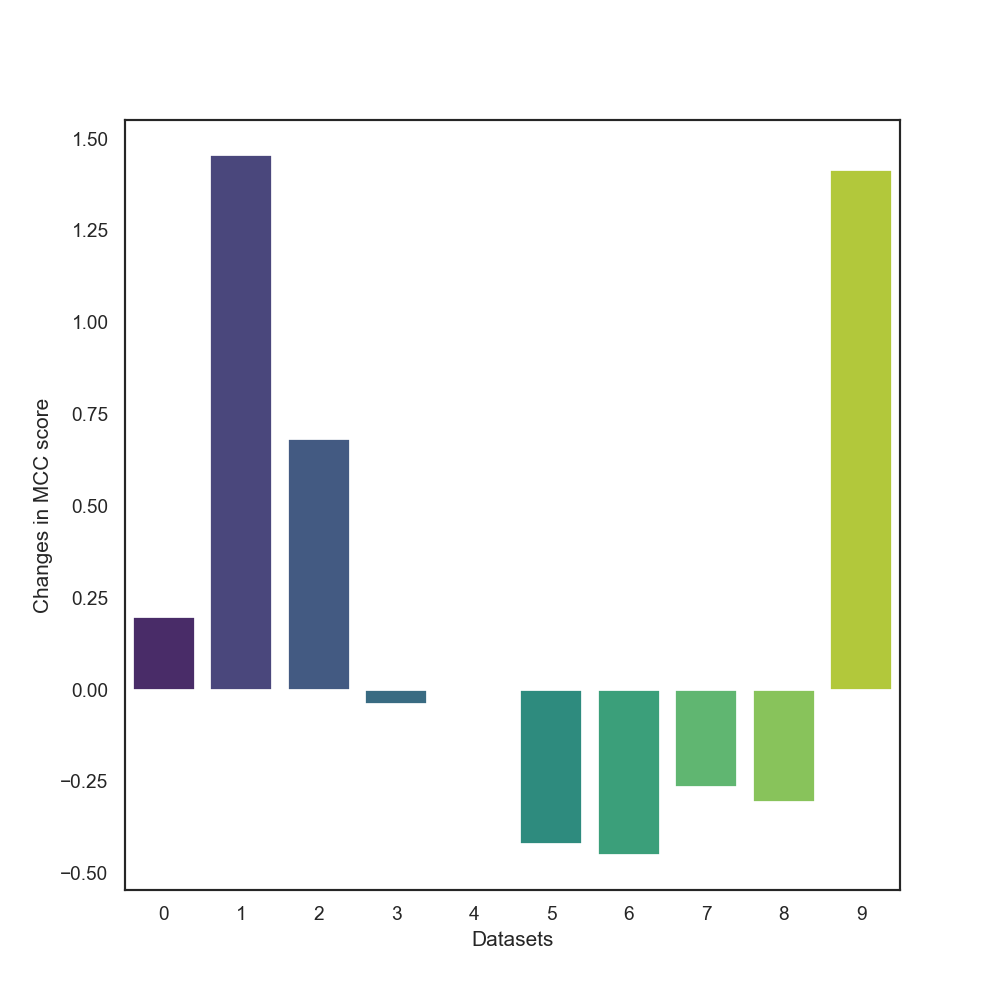

Text(0, 0.5, 'Changes in MCC score')

In [24]:
sns.set(style="white")
plt.figure(figsize=(8, 8))
ax=sns.barplot(x=data.index, y='diff', data=data, palette='viridis')
#plt.title('Bar Plot Example')
plt.xlabel('Datasets')
plt.ylabel('Changes in MCC score')
#ax.set_xticks([10, 20, 30, 40, 50, 60])
#plt.show()
#ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

In [25]:
plt.savefig('icost_dt_multi.pdf', dpi=600)
plt.savefig('icsot_dt_multi.png', dpi=600)

In [26]:
data= pd.read_excel('icost_svm_multi.xlsx', sheet_name=1)
data

,Unnamed: 0,dataset,DT,CS-DT,icost
0,1,thyroid,38.123244,46.072146,47.236473
1,2,new-thyroid,87.024413,91.831077,92.554067
2,3,Contraceptive,23.168678,27.221453,27.545551
3,4,shuttle,91.298668,95.137893,93.342820
4,5,Dry_Bean,90.181439,90.836331,90.744671
5,6,balance,83.887992,75.891437,76.444166
6,7,pageblocks,65.162056,70.946011,71.114704
7,8,HCV,48.663159,65.598021,66.019818
8,9,Yeast,47.304629,45.206953,44.319278
9,10,wine,98.257613,98.093847,97.168086


In [27]:
data['diff']= data.icost-data['CS-DT']
data

,Unnamed: 0,dataset,DT,CS-DT,icost,diff
0,1,thyroid,38.123244,46.072146,47.236473,1.164327
1,2,new-thyroid,87.024413,91.831077,92.554067,0.722991
2,3,Contraceptive,23.168678,27.221453,27.545551,0.324097
3,4,shuttle,91.298668,95.137893,93.342820,-1.795073
4,5,Dry_Bean,90.181439,90.836331,90.744671,-0.091660
5,6,balance,83.887992,75.891437,76.444166,0.552730
6,7,pageblocks,65.162056,70.946011,71.114704,0.168693
7,8,HCV,48.663159,65.598021,66.019818,0.421797
8,9,Yeast,47.304629,45.206953,44.319278,-0.887675
9,10,wine,98.257613,98.093847,97.168086,-0.925760


<IPython.core.display.Javascript object>


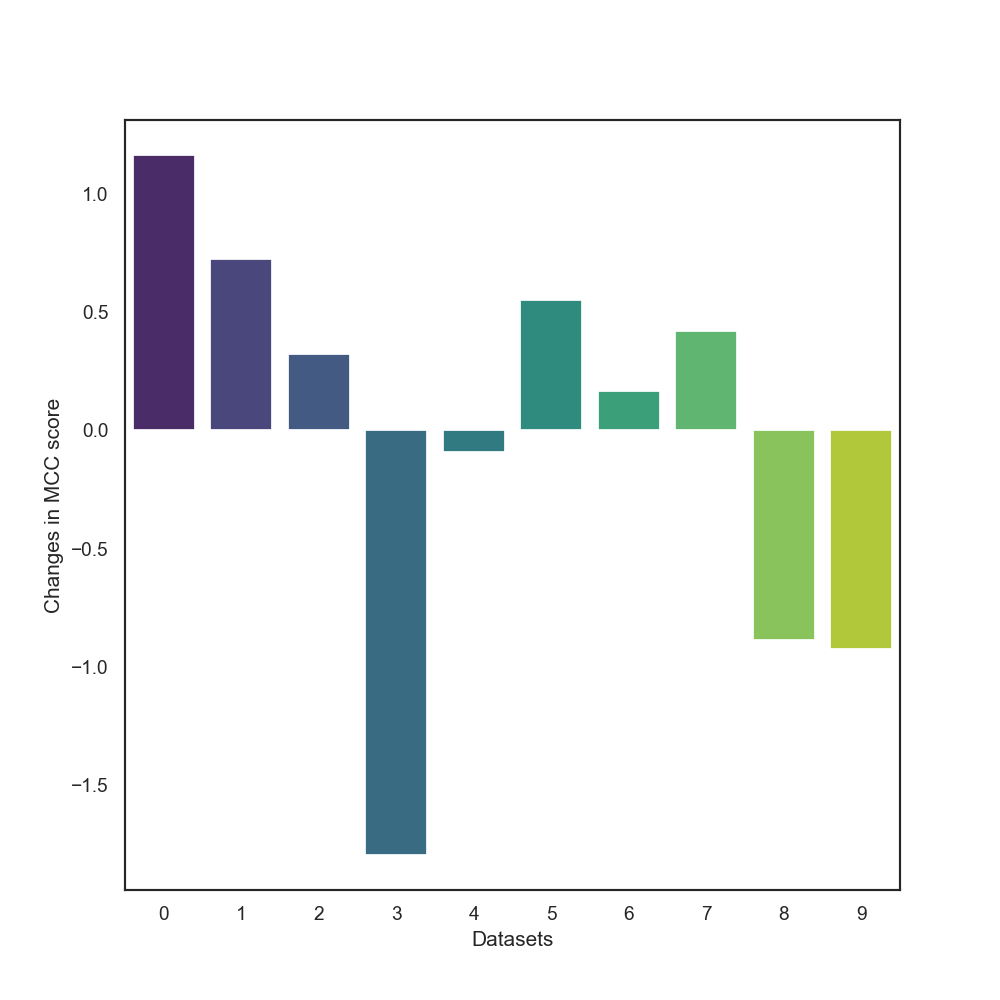

Text(0, 0.5, 'Changes in MCC score')

In [28]:
sns.set(style="white")
plt.figure(figsize=(8, 8))
ax=sns.barplot(x=data.index, y='diff', data=data, palette='viridis')
#plt.title('Bar Plot Example')
plt.xlabel('Datasets')
plt.ylabel('Changes in MCC score')
#ax.set_xticks([10, 20, 30, 40, 50, 60])
#plt.show()
#ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

In [29]:
plt.savefig('icost_svm_multi.pdf', dpi=600)
plt.savefig('icsot_svm_multi.png', dpi=600)

In [30]:
data= pd.read_excel('icost_rf_multi.xlsx', sheet_name=1)
data

,Unnamed: 0,dataset,DT,CS-DT,icost
0,1,thyroid,97.351968,97.635633,97.727888
1,2,new-thyroid,91.862595,92.140340,92.234656
2,3,Contraceptive,25.769682,26.176075,26.020880
3,4,shuttle,99.406517,99.341931,99.354772
4,5,Dry_Bean,90.951829,91.082887,91.101461
5,6,balance,76.464707,77.257392,75.625588
6,7,pageblocks,86.617493,86.300021,86.315197
7,8,HCV,68.177692,68.338099,68.248222
8,9,Yeast,50.072894,50.687839,51.029314
9,10,wine,97.867888,97.620146,97.620066


In [31]:
data['diff']= data.icost-data['CS-DT']
data

,Unnamed: 0,dataset,DT,CS-DT,icost,diff
0,1,thyroid,97.351968,97.635633,97.727888,0.092255
1,2,new-thyroid,91.862595,92.140340,92.234656,0.094316
2,3,Contraceptive,25.769682,26.176075,26.020880,-0.155194
3,4,shuttle,99.406517,99.341931,99.354772,0.012841
4,5,Dry_Bean,90.951829,91.082887,91.101461,0.018573
5,6,balance,76.464707,77.257392,75.625588,-1.631804
6,7,pageblocks,86.617493,86.300021,86.315197,0.015176
7,8,HCV,68.177692,68.338099,68.248222,-0.089877
8,9,Yeast,50.072894,50.687839,51.029314,0.341476
9,10,wine,97.867888,97.620146,97.620066,-0.000080


<IPython.core.display.Javascript object>


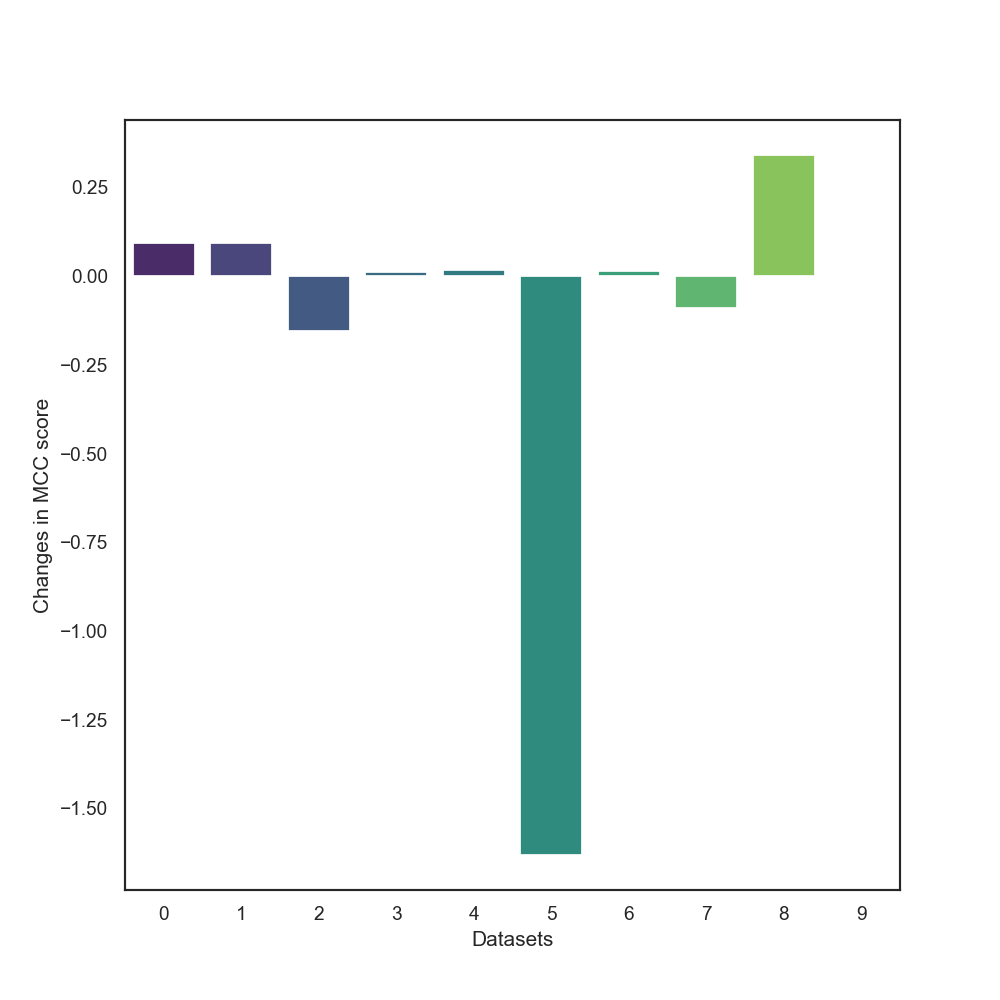

Text(0, 0.5, 'Changes in MCC score')

In [32]:
sns.set(style="white")
plt.figure(figsize=(8, 8))
ax=sns.barplot(x=data.index, y='diff', data=data, palette='viridis')
#plt.title('Bar Plot Example')
plt.xlabel('Datasets')
plt.ylabel('Changes in MCC score')
#ax.set_xticks([10, 20, 30, 40, 50, 60])
#plt.show()
#ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

In [33]:
plt.savefig('icost_rf_multi.pdf', dpi=600)
plt.savefig('icsot_rf_multi.png', dpi=600)

# Multiclass - updated results

In [3]:
data= pd.read_excel('icost_svm_multi.xlsx', sheet_name=1)
data

,Unnamed: 0,dataset,DT,CS-DT,icost
0,1,thyroid,38.123244,46.072146,56.650000
1,2,new-thyroid,87.024413,91.831077,92.554067
2,3,Contraceptive,23.168678,27.221453,27.950000
3,4,shuttle,91.298668,95.137893,95.930000
4,5,Dry_Bean,90.181439,90.836331,90.744671
5,6,balance,83.887992,75.891437,87.440000
6,7,pageblocks,65.162056,70.946011,71.114704
7,8,HCV,48.663159,65.598021,66.019818
8,9,Yeast,47.304629,45.206953,48.290000
9,10,wine,98.257613,98.093847,97.920000


In [4]:
data['diff']= data.icost-data['CS-DT']
data

,Unnamed: 0,dataset,DT,CS-DT,icost,diff
0,1,thyroid,38.123244,46.072146,56.650000,10.577854
1,2,new-thyroid,87.024413,91.831077,92.554067,0.722991
2,3,Contraceptive,23.168678,27.221453,27.950000,0.728547
3,4,shuttle,91.298668,95.137893,95.930000,0.792107
4,5,Dry_Bean,90.181439,90.836331,90.744671,-0.091660
5,6,balance,83.887992,75.891437,87.440000,11.548563
6,7,pageblocks,65.162056,70.946011,71.114704,0.168693
7,8,HCV,48.663159,65.598021,66.019818,0.421797
8,9,Yeast,47.304629,45.206953,48.290000,3.083047
9,10,wine,98.257613,98.093847,97.920000,-0.173847


<IPython.core.display.Javascript object>


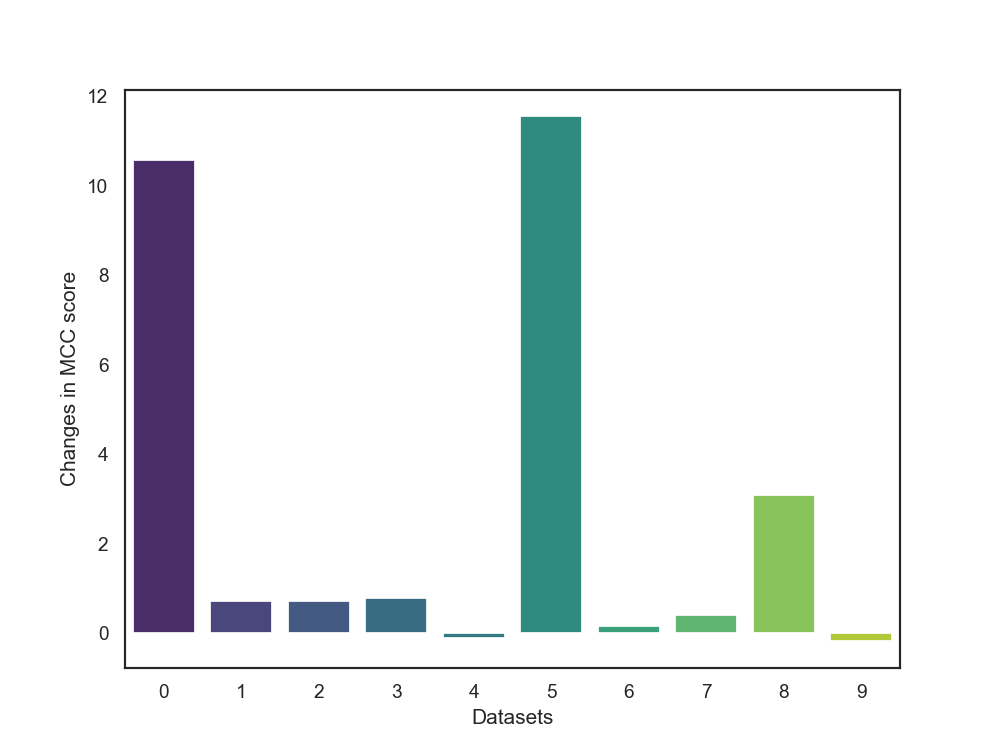

Text(0, 0.5, 'Changes in MCC score')

In [7]:
sns.set(style="white")
plt.figure(figsize=(8, 6))
ax=sns.barplot(x=data.index, y='diff', data=data, palette='viridis')
#plt.title('Bar Plot Example')
plt.xlabel('Datasets')
plt.ylabel('Changes in MCC score')
#ax.set_xticks([10, 20, 30, 40, 50, 60])
#plt.show()
#ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

In [8]:
plt.savefig('icost_svm_multi.pdf', dpi=600)
plt.savefig('icsot_svm_multi.png', dpi=600)

In [9]:
data= pd.read_excel('icost_dt_multi.xlsx', sheet_name=1)
data

,Unnamed: 0,dataset,DT,CS-DT,icost
0,1,thyroid,96.519664,96.084181,96.460000
1,2,new-thyroid,84.780138,83.055733,84.510849
2,3,Contraceptive,19.124736,19.280697,20.370000
3,4,shuttle,98.872393,98.960843,98.922945
4,5,Dry_Bean,86.369881,86.404609,86.406786
5,6,balance,68.324822,67.875672,68.300000
6,7,pageblocks,80.036992,79.506689,79.800000
7,8,HCV,60.066517,60.572728,61.410000
8,9,Yeast,31.208674,32.382702,32.360000
9,10,wine,87.190145,87.333286,88.747229


In [10]:
data['diff']= data.icost-data['CS-DT']
data

,Unnamed: 0,dataset,DT,CS-DT,icost,diff
0,1,thyroid,96.519664,96.084181,96.460000,0.375819
1,2,new-thyroid,84.780138,83.055733,84.510849,1.455116
2,3,Contraceptive,19.124736,19.280697,20.370000,1.089303
3,4,shuttle,98.872393,98.960843,98.922945,-0.037898
4,5,Dry_Bean,86.369881,86.404609,86.406786,0.002177
5,6,balance,68.324822,67.875672,68.300000,0.424328
6,7,pageblocks,80.036992,79.506689,79.800000,0.293311
7,8,HCV,60.066517,60.572728,61.410000,0.837272
8,9,Yeast,31.208674,32.382702,32.360000,-0.022702
9,10,wine,87.190145,87.333286,88.747229,1.413944


<IPython.core.display.Javascript object>


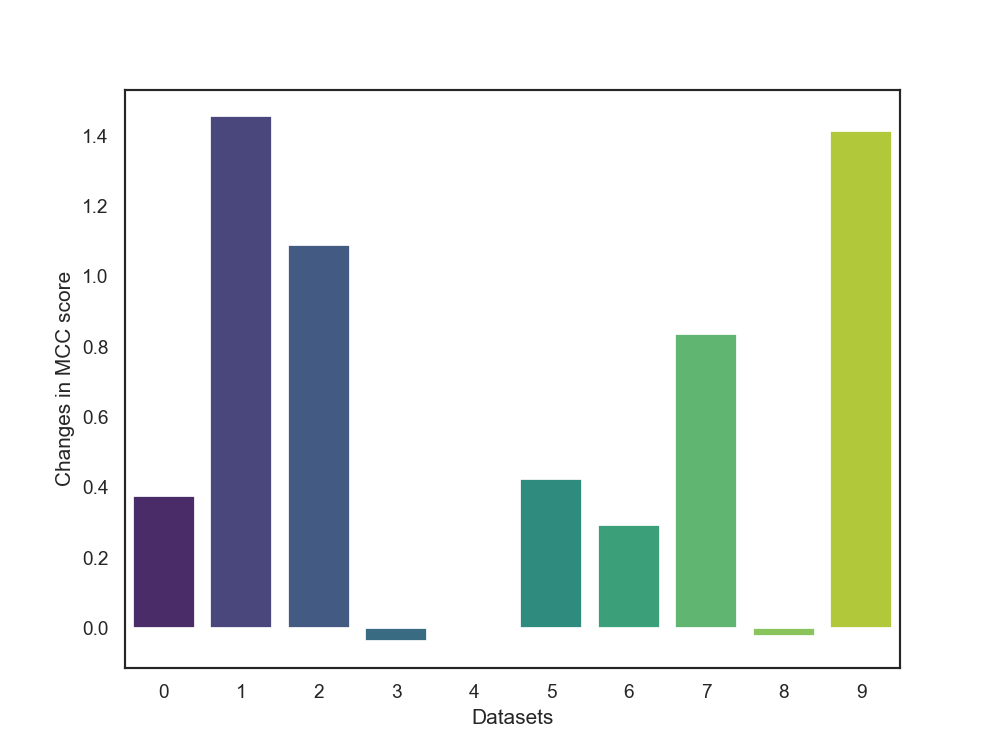

Text(0, 0.5, 'Changes in MCC score')

In [11]:
sns.set(style="white")
plt.figure(figsize=(8, 6))
ax=sns.barplot(x=data.index, y='diff', data=data, palette='viridis')
#plt.title('Bar Plot Example')
plt.xlabel('Datasets')
plt.ylabel('Changes in MCC score')
#ax.set_xticks([10, 20, 30, 40, 50, 60])
#plt.show()
#ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

In [12]:
plt.savefig('icost_dt_multi.pdf', dpi=600)
plt.savefig('icsot_dt_multi.png', dpi=600)

In [13]:
data= pd.read_excel('icost_rf_multi.xlsx', sheet_name=1)
data

,Unnamed: 0,dataset,DT,CS-DT,icost
0,1.0,thyroid,97.351968,97.635633,97.727888
1,2.0,new-thyroid,91.862595,92.140340,92.860000
2,3.0,Contraceptive,25.769682,26.176075,26.020880
3,4.0,shuttle,99.406517,99.341931,99.370000
4,5.0,Dry_Bean,90.951829,91.082887,91.101461
5,6.0,balance,76.464707,77.257392,75.625588
6,7.0,pageblocks,86.617493,86.300021,86.315197
7,8.0,HCV,68.177692,68.338099,68.410000
8,9.0,Yeast,50.072894,50.687839,51.029314
9,10.0,wine,97.867888,97.620146,97.700000


In [14]:
data=data.iloc[:10,1:]
data

,dataset,DT,CS-DT,icost
0,thyroid,97.351968,97.635633,97.727888
1,new-thyroid,91.862595,92.140340,92.860000
2,Contraceptive,25.769682,26.176075,26.020880
3,shuttle,99.406517,99.341931,99.370000
4,Dry_Bean,90.951829,91.082887,91.101461
5,balance,76.464707,77.257392,75.625588
6,pageblocks,86.617493,86.300021,86.315197
7,HCV,68.177692,68.338099,68.410000
8,Yeast,50.072894,50.687839,51.029314
9,wine,97.867888,97.620146,97.700000


In [15]:
data['diff']= data.icost-data['CS-DT']
data

,dataset,DT,CS-DT,icost,diff
0,thyroid,97.351968,97.635633,97.727888,0.092255
1,new-thyroid,91.862595,92.140340,92.860000,0.719660
2,Contraceptive,25.769682,26.176075,26.020880,-0.155194
3,shuttle,99.406517,99.341931,99.370000,0.028069
4,Dry_Bean,90.951829,91.082887,91.101461,0.018573
5,balance,76.464707,77.257392,75.625588,-1.631804
6,pageblocks,86.617493,86.300021,86.315197,0.015176
7,HCV,68.177692,68.338099,68.410000,0.071901
8,Yeast,50.072894,50.687839,51.029314,0.341476
9,wine,97.867888,97.620146,97.700000,0.079854


<IPython.core.display.Javascript object>


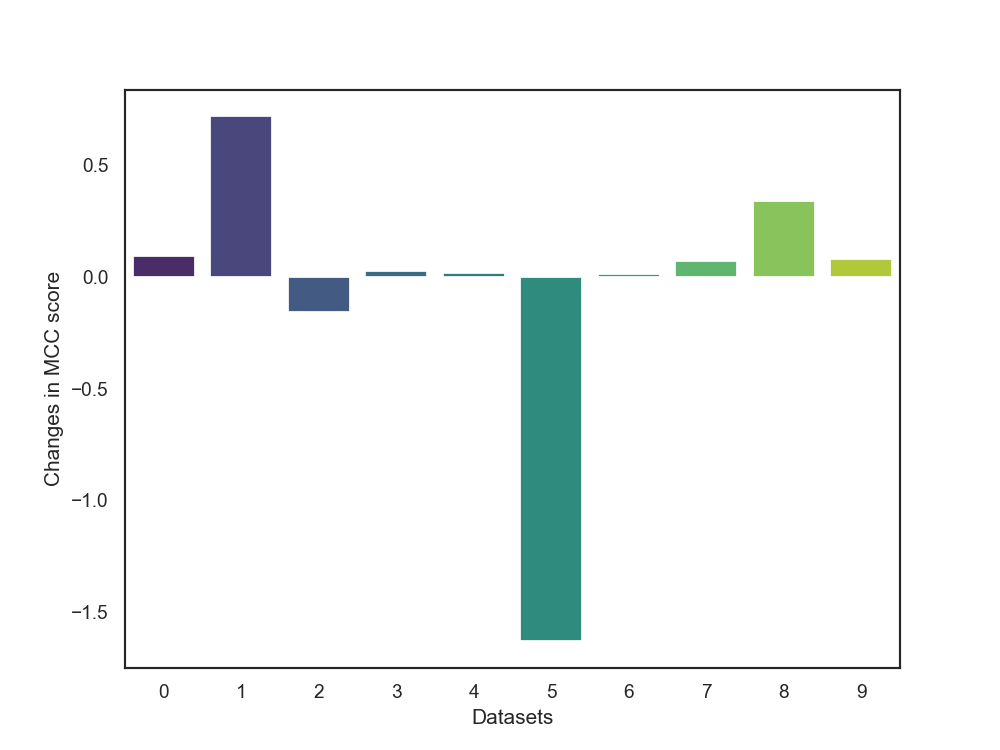

Text(0, 0.5, 'Changes in MCC score')

In [16]:
sns.set(style="white")
plt.figure(figsize=(8, 6))
ax=sns.barplot(x=data.index, y='diff', data=data, palette='viridis')
#plt.title('Bar Plot Example')
plt.xlabel('Datasets')
plt.ylabel('Changes in MCC score')
#ax.set_xticks([10, 20, 30, 40, 50, 60])
#plt.show()
#ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

In [17]:
plt.savefig('icost_rf_multi.pdf', dpi=600)
plt.savefig('icsot_rf_multi.png', dpi=600)

In [18]:
data= pd.read_excel('icost_lr_multi.xlsx', sheet_name=1)
data

,Unnamed: 0,dataset,LR,CS-LR,icost
0,1,thyroid,32.587494,41.772678,42.672927
1,2,new-thyroid,54.563385,68.709808,80.717849
2,3,Contraceptive,22.350253,25.678386,26.041835
3,4,shuttle,60.606568,59.856628,63.192159
4,5,Dry_Bean,88.731615,89.224426,89.428324
5,6,balance,76.304306,82.271722,84.796032
6,7,pageblocks,51.144529,62.204421,64.193420
7,8,HCV,36.999179,52.179922,56.398371
8,9,Yeast,41.090845,41.245258,44.750000
9,10,wine,97.695873,96.341541,97.260000


In [19]:
data['diff']= data.icost-data['CS-LR']
data

,Unnamed: 0,dataset,LR,CS-LR,icost,diff
0,1,thyroid,32.587494,41.772678,42.672927,0.900249
1,2,new-thyroid,54.563385,68.709808,80.717849,12.008041
2,3,Contraceptive,22.350253,25.678386,26.041835,0.363449
3,4,shuttle,60.606568,59.856628,63.192159,3.335530
4,5,Dry_Bean,88.731615,89.224426,89.428324,0.203898
5,6,balance,76.304306,82.271722,84.796032,2.524310
6,7,pageblocks,51.144529,62.204421,64.193420,1.988999
7,8,HCV,36.999179,52.179922,56.398371,4.218449
8,9,Yeast,41.090845,41.245258,44.750000,3.504742
9,10,wine,97.695873,96.341541,97.260000,0.918459


<IPython.core.display.Javascript object>


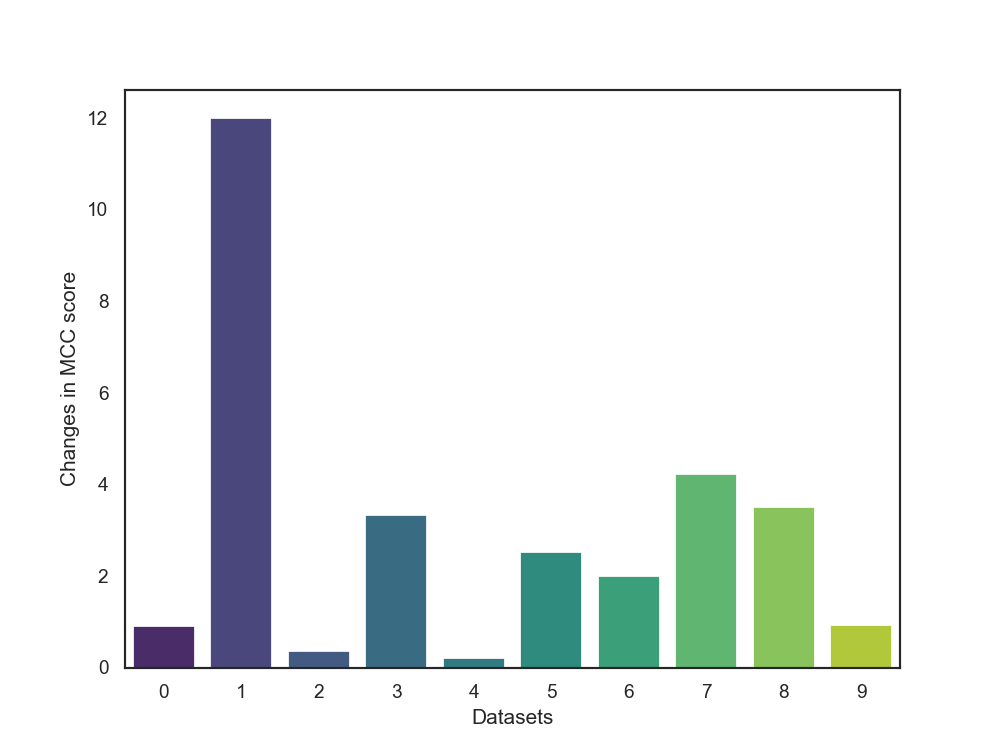

Text(0, 0.5, 'Changes in MCC score')

In [20]:
sns.set(style="white")
plt.figure(figsize=(8, 6))
ax=sns.barplot(x=data.index, y='diff', data=data, palette='viridis')
#plt.title('Bar Plot Example')
plt.xlabel('Datasets')
plt.ylabel('Changes in MCC score')
#ax.set_xticks([10, 20, 30, 40, 50, 60])
#plt.show()
#ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

In [21]:
plt.savefig('icost_lr_multi.pdf', dpi=600)
plt.savefig('icsot_lr_multi.png', dpi=600)